### Your details

Your Name: Cathaoir Agnew

Your ID number: 16171659

# Task 1

## Option ? (which option did you pick?)

Option 1: Symbolic calculation of the derivative and plotting

Write two Python functions to: 

    Symbolically calculate the derivative of a polynomial with one variable. 

    Evaluate (i.e. get the numerical value) of a polynomial for a given value of its variable. 

Then: 

    Test your code with a few salient polynomials (minimum of 3) for which you have calculated the derivative of these polynomials manually. 

    Convince yourself that f'(x) ~= (f(x + h) - f(x)) / h for small values of h and a given value of x. Observe that it gets closer to the true value the smaller you make h.

Then: 

    Plot the polynomial and its derivative over an arbitrary domain using matplotlib 


## Approach

Used pairs of python lists to hold coefficients and powers seperately. I wrote functions that firstly check that the python list for coefficient(s) has at least 1 entry, and that the python list of the coefficient(s) match the length of the python list of power(s). Followed rules of maths for the differentiation function code:  x^n = n * x^ n-1  and followed the rules of maths for eval_poly function code. Tried a couple of test cases for each function. 

I created functions for calculating/approximating the derivitive from first principals, and then used this to create a function that evaluates for a given value of x, the value of the first principals function. This function calculates the derivitve for a single value of x, but ranges over the value of h, the step of which we move. As h (the step) gets smaller , the function better approxs to the true value of the differentiation 

Finally for graphing the f(x) and f'(x) I used the previous functions created to bring it all together and plot the graphs with matplotlib.pyplot.

## Manual Calculations

### Derivates Checks 

f(x) = 1x^6

f'(x) = 6x^5



f(x) = 1x^6 + 2x^7

f'(x) = 6x^5 + 14x^6



f(x) = -1x^6 + 2x^-7

f'(x) = -6x^5 + -14x^-8



f(x) = 0x^6 + 2x^0

f'(x) = 0



f(x) = 1x^6 + 2x^7 + 3x^5

f'(x) = 6x^5 + 14x^6 + 15x^4



f(x) = -1x^-6 + -2x^-7 + -3x^-5

f'(x) = 6x^-7 + 14x^-8 + 15x^-6



f(x) = 1x^6 + 0x^7 + 3x^0 + 5x^4

f'(x) = 6x^5 + 20x^3


### Eval_poly Checks

f(x) = 1x^2                @ x = 2  =>  1(2)^2 = 4 
 
f(x) = 2x^1 + 3x^2         @ x = 3  =>  2(3) + 3(9) = 6 + 27 = 33

f(x) = -1x^2 + 2x^-3       @ x = 1  =>  -1(1)^2 + 2(1)^3 = -1 + 2 = 1 

f(x) = -1x^2 + 2x^-3       @ x = -1 =>  -1(-1)^2 + 2(-1)^3 = -1 + 2(-1)  = -3 
 
f(x) = 0x^6 + 2x^0         @ x = 2  =>  0 + 2 = 2      (Anything to the power of 0 = 1, and multiplying by 0 is always 0)
  
f(x) = 1x^2 + 2x^2         @ x = 0  =>  1(0) + 2(0) = 0

f(x) = 1x^2 + 2x^3 + 3x^4  @ x = 2  =>  1(4) + 2(8) + 3(16) = 4 + 16 + 48 = 68 


### First Principles Checks

For first principal it would take too long to type out manually all the results: so I will just differentiate the function, and find the real value, and check does my first principles function start to converge on the true value

#### First,  f(x) = x^2  => f'(x) = 2(x)      so f'(x)  @ x = 2   => 2(2) = 4 
       
Running below: we can see its converging to 4:

first_principal_eval( [1] , [2] , 2 , 0.01)

#### Second, f(x) = x^2 + 2x^2  => f'(x) = 2(x) + 4(x) = 6(x)     so f'(x)  @ x = 5   => 6(5) = 30

Running below: we can see its converging on 30:

first_principal_eval( [1,2] , [2,2] , 5 , 0.01 )

#### Third, f(x) = 3x^1 + 2x^2  => f'(x) = 3 + 4(x)    so f'(x)  @ x = 4   => 3 + 4(4) = 3 + 16 = 19

Running below: we can see its converging on 19:

first_principal_eval( [3,2] , [1,2] , 4 , 0.005 )


### Graphs Checks 

f(x) = x^2  so f'(x) = 2x   , we can see this is in fact the correct graph as @ x = 2, the lines intersect (reduce range of x on plot to better see this is true, if needed)


f(x) = 1x^1 + 2    f'(x) = 1  , we can see this is in fact the correct graph as @ x = 1 , f(x) = 3 and f'(x) =1  (reduce range of x on plot to better see this is true, if needed)

f(x) = x + 2x^2      f'(x) = 1 + 4(x) , we can see this is in fact the correct graph as @ x = 0 , f(x) = 0 and f'(x) = 1  (reduce range of x on plot to better see this is true, if needed)



In [1]:
# Your code

In [2]:
# Link:   https://stackoverflow.com/questions/36786722/how-to-display-full-output-in-jupyter-not-only-last-result

# making notebook print out all print statements 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# function that differentiates a function, and prints both f(x) and f'(x) in a user friendly way

def differentiate(coeffs , powers): 
    """Function that differentiates a polynomial. Input parameters are a python list of coeffiecients 
       and a python list of the coefficients power of x. The lengths of coeffs should match lenth of powers,
       if a constant exists, the power of x should be inputed as 0 for the constants coefficient,
       as this is mathematical correct"""
    
    #initalizing strings for printing out 
    string_func = "f(x) = "
    string_diff = "f'(x) = "
    
    #inital string length of string_diff  
    int_string = len(string_diff)
    
    
    # making sure there is at least 1 coefficent and power,
    # and if length of coefficent does not equal length of power prints out message letting you know  
    if len(coeffs) >= 1 and len(coeffs) == len(powers):
        
        for i in range(len(coeffs)):
            
            #print out the function to begin with 
            string_func = string_func + str(coeffs[i]) + "x^" + str(powers[i])
            
            # adding an "+" inbetween terms in the function  
            if i != (len(coeffs)-1):
                    string_func = string_func + " + "
        
            #if any 0 contained in either coeffs or power, it will automatically become 0, so can be ignored  
            if coeffs[i] == 0 or powers[i] == 0:
                continue
            
            
            # differentiating x**n , would be n * x ** (n-1)
            
            # calculating the power*coeff to get the new coefficient
            new_coeff = (powers[i] * coeffs[i] )
            
            # updating the string to reflect new power and coeff
            string_diff = string_diff + str(new_coeff) + "x^" + str(powers[i]-1)
            
            # adding a "+" between terms in function
            if i != (len(coeffs)-1):
                string_diff = string_diff + " + "
        
        # printing final string of the function f(x)
        print(string_func)

    # if outcome from differention is zero, it just prints out zero to be more clear 
    
        if len(string_diff) == int_string:
            string_diff = string_diff + "0"
        print(string_diff)
        
        
    else: 
        print("Please input 1 or more values for coefficents & powers \n and make sure you have the same number of coefficeints as powers. Use power = 0 for constants")
    

In [4]:
# function that differentiates a function, and outputs f'(x) in terms of a python list for coefficients and a list for powers
def differentiate_number(coeffs , powers): 
    """Function that differentiates a polynomial. Input parameters are a python list of coeffiecients 
       and a python list of the coefficients power of x. The lengths of coeffs should match lenth of powers,
       if a constant exists, the power of x should be inputed as 0 for the constants coefficient,
       as this is mathematical correct, the output is a python list of the differentiated function, first list is the coefficients 
       and the second python list is the powers"""
    
    #initialize lists
    new_coeff = []
    new_power = []
    
    # making sure there is at least 1 coefficent and power,
    # and if length of coefficent does not equal length of power prints out message letting you know  
    if len(coeffs) >= 1 and len(coeffs) == len(powers):
        
        for i in range(len(coeffs)):
        
            #if any 0 contained in either coeffs or power, it will automatically become 0, so can be ignored
            if coeffs[i] == 0 or powers[i] == 0:
                continue
               
           
            # differentiating x**n , would be n * x ** (n-1) 
            
            # calculating the power*coeff to get the new coefficient
            new_coeff.append(powers[i] * coeffs[i])
            
            #updating the new power 
            new_power.append(powers[i]-1)

        return new_coeff, new_power
    
    else: 
        print("Please input 1 or more values for coefficents & powers \n and make sure you have the same number of coefficeints as powers. Use power = 0 for constants")
    

In [5]:
# single value
differentiate([1], [6])

f(x) = 1x^6
f'(x) = 6x^5


In [6]:
# single value
differentiate_number([1], [6])

([6], [5])

In [7]:
# more than one 
differentiate([1,2], [6,7])

f(x) = 1x^6 + 2x^7
f'(x) = 6x^5 + 14x^6


In [8]:
# more than one 
differentiate_number([1,2], [6,7])

([6, 14], [5, 6])

In [9]:
# postive & negtive
differentiate([-1,2], [6,-7])

f(x) = -1x^6 + 2x^-7
f'(x) = -6x^5 + -14x^-8


In [10]:
# postive & negtive
differentiate_number([-1,2], [6,-7])

([-6, -14], [5, -8])

In [11]:
# check of zeros
differentiate([0,2], [6,0])

f(x) = 0x^6 + 2x^0
f'(x) = 0


In [12]:
# check of zeros
differentiate_number([0,2], [6,0])

([], [])

In [13]:
# checking muiltple number 
differentiate([1,2,3], [6,7,5])

f(x) = 1x^6 + 2x^7 + 3x^5
f'(x) = 6x^5 + 14x^6 + 15x^4


In [14]:
# checking muiltple number 
differentiate_number([1,2,3], [6,7,5])

([6, 14, 15], [5, 6, 4])

In [15]:
# checking all negatives
differentiate([-1,-2,-3], [-6,-7,-5])

f(x) = -1x^-6 + -2x^-7 + -3x^-5
f'(x) = 6x^-7 + 14x^-8 + 15x^-6


In [16]:
# checking all negatives
differentiate_number([-1,-2,-3], [-6,-7,-5])

([6, 14, 15], [-7, -8, -6])

In [17]:
# checking muiltple number 
differentiate([1,0,3,5], [6,7,0,4])

f(x) = 1x^6 + 0x^7 + 3x^0 + 5x^4
f'(x) = 6x^5 + 20x^3


In [18]:
# checking muiltple number 
differentiate_number([1,0,3,5], [6,7,0,4])

([6, 20], [5, 3])

In [19]:
# checking muiltple number 
differentiate([], [])

Please input 1 or more values for coefficents & powers 
 and make sure you have the same number of coefficeints as powers. Use power = 0 for constants


In [20]:
# checking muiltple number 
differentiate([2], [])

Please input 1 or more values for coefficents & powers 
 and make sure you have the same number of coefficeints as powers. Use power = 0 for constants


In [21]:
## this is nicely formatted string evaluating function  
## if power is negative cant take 0 as x value as this would imply dividing by 0 which is undefined 

def eval_poly(coeffs , powers, val_of_x):
    """Function that evaluates a polynomial at a given value of x. Input parameters are a python list of coeffiecients,
    a python list of the coefficients power of x, and a value of x to be evaluate the polynomial. 
    The lengths of coeffs should match the lenth of powers, if a constant exists, x should be inputed as 0 for that power,
    as this is mathematical correct"""
    
    #initalizing strings for printing out 
    string_func = "f(x) = "
    string_eval = "f(" + str(val_of_x) + ") = "
    
    #initializing variables 
    val_of_function = 0
    divide_by_zero = False
        
    # making sure there is at least 1 coefficent, power and value of x
    # and if length of coefficents does not equal length of powers, prints out message letting you know  
    if len(coeffs) >= 1 and len(coeffs) == len(powers):
        
        for i in range(len(coeffs)):
            
            #print out the function 
            string_func = string_func + str(coeffs[i]) + "x^" + str(powers[i])
            
            # adding an "+" between the terms of the function when printing out 
            if i != (len(coeffs)-1):
                    string_func = string_func + " + "
            
            #if a 0  is contained in coeffs, it will automatically become 0, so can be ignored  
            if coeffs[i] == 0:
                continue
            
            # if a power is negative, it is undefined at x = 0
            if powers[i] < 0 and val_of_x == 0:
                print("Function is undefined at 0, as it is trying to divide by zero")
                divide_by_zero = True
                
            # exiting the for loop for an undefined function when dividing by zero 
                break    
            
            #evaluating the value of the function 
            val_of_function += coeffs[i] * ( val_of_x ** powers[i] )
            
        # adding the value of the function to the print statement   
        string_eval = string_eval + str(val_of_function)
        
        # prints out the values of the statement as long as divide by zero is not encountered
        if divide_by_zero == False:        
            print(string_func)
            print(string_eval)

    else: 
        print("Please input 1 or more values for coefficents & powers \n and make sure you have the same number of coefficeints as powers. Use power = 0 for constants")
    

In [22]:
def eval_poly_number(coeffs , powers, val_of_x):
    """Function that evaluates a polynomial at a given value of x, but output is just the function value.
    Input parameters are a python list of coeffiecients, a python list of the coefficients power of x,
    and a value of x to be evaluate the polynomial. The lengths of coeffs should match lenth of powers, if a constant exists,
    x should be inputed as 0 for that power, as this is mathematical correct"""
    
    #initialize final result variable
    val_of_function = 0
    
    # making sure there is at least 1 coefficent, power and value of x
    # and if length of coefficents does not equal length of powers, prints out message letting you know  
    if len(coeffs) >= 1 and len(coeffs) == len(powers):
        
        for i in range(len(coeffs)):
            
             # if a power is negative, it is undefined at x = 0
            
            if powers[i] < 0 and val_of_x == 0:
                print("Function is undefined at 0, as it is trying to divide by zero")
                
             # exiting the for loop for an undefined function when dividing by zero 
                break 
                
            #evaluating the value of the function 
            val_of_function += coeffs[i] * ( val_of_x ** powers[i] )  
       
    
        return val_of_function  
    
    else: 
         print("Please input 1 or more values for coefficents & powers \n and make sure you have the same number of coefficeints as powers. Use power = 0 for constants")
          

In [23]:
# single value 
eval_poly([1],[2], 2)

f(x) = 1x^2
f(2) = 4


In [24]:
# single value 
eval_poly_number([1],[2], 2)

4

In [25]:
# more than one 
eval_poly([2,3], [1,2], 3)

f(x) = 2x^1 + 3x^2
f(3) = 33


In [26]:
# more than one 
eval_poly_number([2,3], [1,2], 3)

33

In [27]:
# postive & negtive
eval_poly([-1,2], [2,-3] , 1)

f(x) = -1x^2 + 2x^-3
f(1) = 1.0


In [28]:
# postive & negtive
eval_poly_number([-1,2], [2,-3] , 1)

1.0

In [29]:
# postive & negtive
eval_poly([-1,2], [2,-3] , -1)

f(x) = -1x^2 + 2x^-3
f(-1) = -3.0


In [30]:
# postive & negtive
eval_poly_number([-1,2], [2,-3] , -1)

-3.0

In [31]:
# check of zeros
eval_poly([0,2], [6,0], 2)

f(x) = 0x^6 + 2x^0
f(2) = 2


In [32]:
# check of zeros
eval_poly_number([0,2], [6,0], 2)

2

In [33]:
# check of zeros
eval_poly([1,2], [2,2], 0)

f(x) = 1x^2 + 2x^2
f(0) = 0


In [34]:
# check of zeros
eval_poly_number([1,2], [2,2], 0)

0

In [35]:
# check of zeros
eval_poly([1,2], [-2,2], 0)

Function is undefined at 0, as it is trying to divide by zero


In [36]:
# check of zeros
eval_poly_number([1,2], [-2,2], 0)

Function is undefined at 0, as it is trying to divide by zero


0

In [37]:
# checking muiltple number 
eval_poly([1,2,3], [2,3,4], 2)

f(x) = 1x^2 + 2x^3 + 3x^4
f(2) = 68


In [38]:
# checking muiltple number 
eval_poly_number([1,2,3], [2,3,4], 2)

68

In [39]:
# checking muiltple number 
eval_poly([], [], 1)

Please input 1 or more values for coefficents & powers 
 and make sure you have the same number of coefficeints as powers. Use power = 0 for constants


In [40]:
# checking muiltple number 
eval_poly_number([], [], 1)

Please input 1 or more values for coefficents & powers 
 and make sure you have the same number of coefficeints as powers. Use power = 0 for constants


In [41]:
# checking muiltple number 
eval_poly([2], [], 1)

Please input 1 or more values for coefficents & powers 
 and make sure you have the same number of coefficeints as powers. Use power = 0 for constants


In [42]:
# checking muiltple number 
eval_poly_number([2], [], 1)

Please input 1 or more values for coefficents & powers 
 and make sure you have the same number of coefficeints as powers. Use power = 0 for constants


In [43]:
#function that performs first principles to calculate/approx. the derivative 
# f'(x) ~= (f(x + h) - f(x)) / h

def first_principles_diff(coeffs , powers , val_of_x , h ):
    """Function that performs first priciples derivation: f'(x) ~= (f(x + h) - f(x)) / h ,
    inputs are a python list of the coefficients of the function, python list of the powers of the coeffieients
    value of x, and a value of h"""
    
    diff = ( eval_poly_number(coeffs ,powers , (val_of_x + h))  - eval_poly_number(coeffs, powers ,val_of_x) ) / h
    return diff 

In [44]:
# function that evlauates first principle at a value of x, and allows to chose steps size
# Showing first principles differentiation works, and as the smaller the value of h becomes, it converges to the real
# differentiated value using  x**n , would be =  n * x ** (n-1)

def first_principal_eval(coeffs , powers , val_of_x , steps ):
    
    #creating 9 steps, each of size 1 through 10 multiplied by step size ( i.e 0.01)
    j = [x_*steps for x_ in range(1, 10)] 

    # reversing the list, as it looks natural when looking at the print out its converging to real differentiated value
    j.reverse()
    
    # evaluating each iteration of first_principles_diff at val_of_x , for each step j
    for h in j:
        y = first_principles_diff( coeffs , powers , val_of_x , h)
        print(y)
        

In [45]:
first_principal_eval( [1] , [2] , 2 , 0.01)

4.089999999999991
4.080000000000005
4.069999999999992
4.059999999999997
4.049999999999994
4.039999999999999
4.029999999999964
4.020000000000001
4.009999999999891


In [46]:
first_principal_eval( [1,2] , [2,2] , 5 , 0.01 )

30.269999999999996
30.240000000000045
30.209999999999983
30.179999999999772
30.149999999999864
30.120000000000147
30.090000000000337
30.059999999998865
30.02999999999929


In [47]:
first_principal_eval( [3,2] , [1,2] , 4 , 0.005 )

19.089999999999918
19.07999999999994
19.070000000000064
19.060000000000343
19.050000000000296
19.03999999999968
19.029999999999824
19.019999999999726
19.010000000000105


In [48]:
import matplotlib.pyplot as plt 

def display_graphs( coeffs , powers , start_range, end_range, steps ):
    """Function that displays the graph of f(x) in blue , and f'(x) in red
    inputs are a python list of the coefficients, python list of the coefficients powers, a start range, end range
    and how small you want your steps to be"""
    
    #calculating steps , formula taken from sulis site , and made adjustable 
    x_ = [x_* steps  for x_ in range(start_range, end_range)]

    # initalizing variables
    function_eval_at_x = []
    diff_function_eval_at_x = []
    
    # differentiating the inputted function which will return:  a python list of the coefficients (diff_result[0]), 
    # and a python list of the coefficients powers (diff_result[1])
    diff_result = differentiate_number(coeffs, powers)

    # evaluating both f(x) and f'(x) at a value of x , for each step x_
    for k in x_:
        
        function_eval_at_x.append(eval_poly_number(coeffs, powers , k))
        diff_function_eval_at_x.append(eval_poly_number(diff_result[0], diff_result[1], k))
    
    
   
    plt.plot(x_ ,function_eval_at_x , label = "f(x)" )
    plt.plot(x_ , diff_function_eval_at_x , "r--", label = "f'(x)"  )
    plt.legend(loc='upper left' , fontsize = "x-large")
    plt.xlabel("x")
    plt.ylabel("Value of the function")
    plt.title("Graph of f(x) and f'(x)")
    plt.show
    plt.show

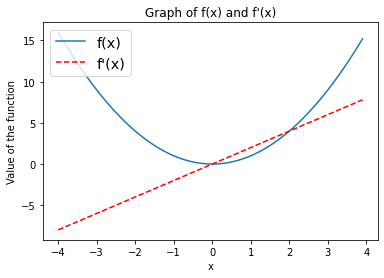

In [49]:
# f(x) = x^2  so f'(x) = 2x
display_graphs([1] , [2] , -40, 40, 0.1 )

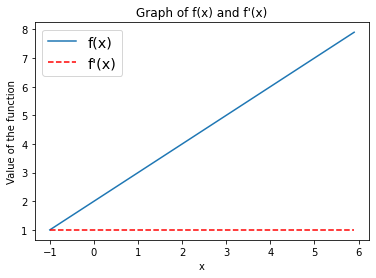

In [50]:
# f(x) = 1x^1 + 2   which is just x+2    f'(x) = 1 
display_graphs([1,2] , [1,0] , -10, 60, 0.1)

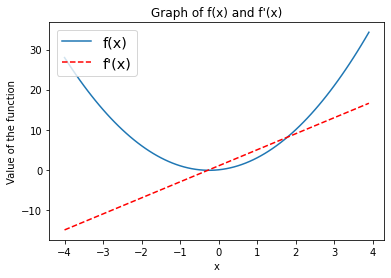

In [51]:
#f(x) = x + 2x^2      f'(x) = 1 + 4(x)
display_graphs([1,2] , [1,2] , -40, 40, 0.1)